In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned.csv')

In [2]:
df.head()

,Unnamed: 0,tookpost,gender,educ,race,CC16_331_1,CC16_331_2,CC16_331_3,CC16_331_7,employ,...,relig_Protestant_y,relig_Roman Catholic_y,relig_Something else_y,pres_Clinton,pres_Johnson,pres_McMullin,pres_None,pres_Other,pres_Stein,pres_Trump
0,0,1,0,High school graduate,White,0,1,0,1,Homemaker,...,0,0,0,0,0,0,0,0,0,1
1,4,1,0,4-year,White,1,0,1,0,Part-time,...,0,0,0,1,0,0,0,0,0,0
2,5,1,0,High school graduate,Mixed,1,1,0,1,Permanently disabled,...,1,0,0,0,0,0,1,0,0,0
3,6,1,1,High school graduate,White,0,1,0,1,Full-time,...,1,0,0,0,0,0,0,0,0,1
4,8,1,1,High school graduate,White,0,1,0,1,Temporarily laid off,...,0,0,0,0,0,0,0,0,0,1


Let's explore some basic distributions:

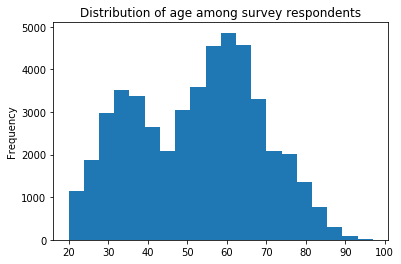

In [4]:
_ = df['age'].plot(kind = 'hist', bins = 20)
_ = plt.title("Distribution of age among survey respondents")
plt.show()

In [29]:
df['age'].describe()

count    48125.000000
mean        52.448623
std         16.138152
min         20.000000
25%         38.000000
50%         54.000000
75%         65.000000
max         97.000000
Name: age, dtype: float64

Median age is 54, mean is 52. Distribution appears to be possibly bimodal. 

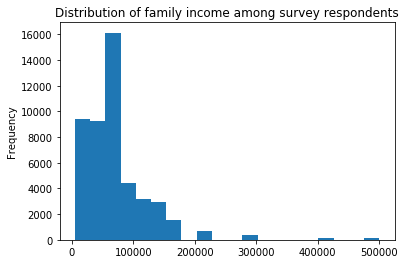

In [5]:
_ = df['faminc_int'].plot(kind = 'hist', bins = 20)
_ = plt.title("Distribution of family income among survey respondents")
plt.show()

pretty right skewed

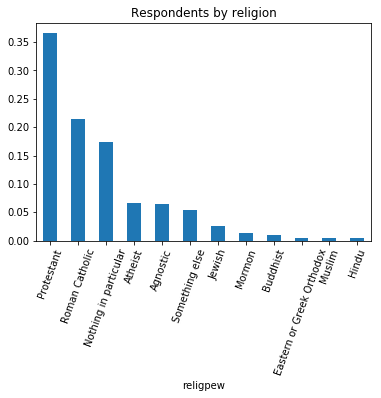

In [6]:
religions = df.groupby(['religpew']).size().sort_values(ascending = False) / df.shape[0]
_ = religions.plot(kind= 'bar', rot = 70)
_ = plt.title("Respondents by religion")
plt.show()

In [36]:
president_vote = df.groupby(['presvote']).size()
president_vote.sort_values(inplace = True, ascending = False)
president_vote = (president_vote / df.shape[0]) * 100
president_vote

presvote
Hillary Clinton (Democrat)        42.518442
Donald Trump (Republican)         35.725714
I didn't vote in this election    13.984416
Gary Johnson (Libertarian)         3.530390
Other                              2.144416
Jill Stein (Green)                 1.766234
Evan McMullin (Independent)        0.330390
dtype: float64

Break down things by party ID, vote? double bar charts, stacked histograms, etc.

In [9]:
race_pres = df.loc[(df['presvote'] == 'Donald Trump (Republican)') 
       | (df['presvote'] == 'Hillary Clinton (Democrat)')].groupby(['race', 'presvote']).size()

total = df.loc[(df['presvote'] == 'Donald Trump (Republican)') 
       | (df['presvote'] == 'Hillary Clinton (Democrat)')].groupby(['race']).size()

race_ratio = race_pres / total

In [10]:
race_ratio

race             presvote                  
Asian            Donald Trump (Republican)     0.283168
                 Hillary Clinton (Democrat)    0.716832
Black            Donald Trump (Republican)     0.068898
                 Hillary Clinton (Democrat)    0.931102
Hispanic         Donald Trump (Republican)     0.304187
                 Hillary Clinton (Democrat)    0.695813
Middle Eastern   Donald Trump (Republican)     0.283333
                 Hillary Clinton (Democrat)    0.716667
Mixed            Donald Trump (Republican)     0.327957
                 Hillary Clinton (Democrat)    0.672043
Native American  Donald Trump (Republican)     0.594771
                 Hillary Clinton (Democrat)    0.405229
Other            Donald Trump (Republican)     0.680851
                 Hillary Clinton (Democrat)    0.319149
White            Donald Trump (Republican)     0.521829
                 Hillary Clinton (Democrat)    0.478171
dtype: float64

In [11]:
race_ratio = race_ratio.to_frame()

race_ratio

0
race            presvote                            
Asian           Donald Trump (Republican)   0.283168
                Hillary Clinton (Democrat)  0.716832
Black           Donald Trump (Republican)   0.068898
                Hillary Clinton (Democrat)  0.931102
Hispanic        Donald Trump (Republican)   0.304187
                Hillary Clinton (Democrat)  0.695813
Middle Eastern  Donald Trump (Republican)   0.283333
                Hillary Clinton (Democrat)  0.716667
Mixed           Donald Trump (Republican)   0.327957
                Hillary Clinton (Democrat)  0.672043
Native American Donald Trump (Republican)   0.594771
                Hillary Clinton (Democrat)  0.405229
Other           Donald Trump (Republican)   0.680851
                Hillary Clinton (Democrat)  0.319149
White           Donald Trump (Republican)   0.521829
                Hillary Clinton (Democrat)  0.478171

In [ ]:
race_ratio = race_ratio.reset_index(level=[0,1])

In [15]:
race_ratio = race_ratio.pivot(index ='race', columns = 'presvote', values = 0)

race_ratio

presvote,Donald Trump (Republican),Hillary Clinton (Democrat)
race,,
Asian,0.283168,0.716832
Black,0.068898,0.931102
Hispanic,0.304187,0.695813
Middle Eastern,0.283333,0.716667
Mixed,0.327957,0.672043
Native American,0.594771,0.405229
Other,0.680851,0.319149
White,0.521829,0.478171


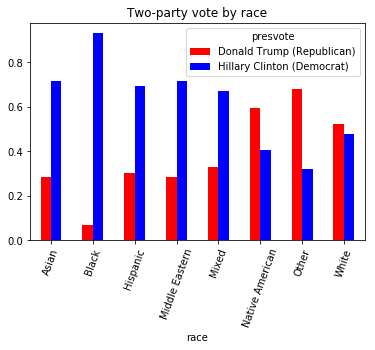

In [16]:
_ = race_ratio.plot(kind = 'bar', rot = 70, color = ['r','b'])
_ = plt.title('Two-party vote by race')
plt.show()

In [ ]:
relig_pres = df.loc[(df['presvote'] == 'Donald Trump (Republican)') 
       | (df['presvote'] == 'Hillary Clinton (Democrat)')].groupby(['religpew', 'presvote']).size()

relig_total = df.loc[(df['presvote'] == 'Donald Trump (Republican)') 
       | (df['presvote'] == 'Hillary Clinton (Democrat)')].groupby(['religpew']).size()

relig_ratio = relig_pres / relig_total

relig_ratio = relig_ratio.to_frame()
relig_ratio = relig_ratio.reset_index(level=[0,1])
relig_ratio = relig_ratio.pivot(index ='religpew', columns = 'presvote', values = 0)

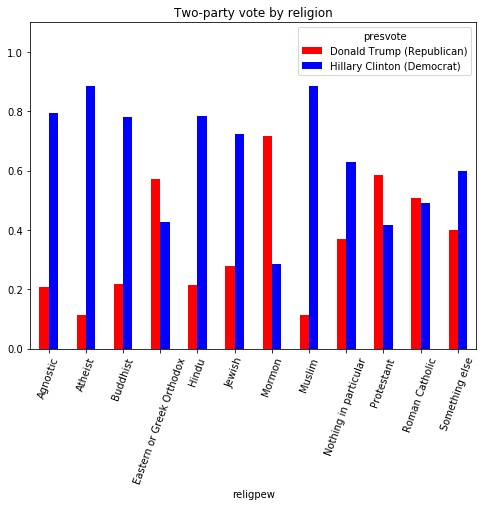

In [26]:
_ = relig_ratio.plot(kind = 'bar', rot = 70, color = ['r','b'], figsize = (8,6))
_ = plt.title('Two-party vote by religion')
_ = plt.ylim(0, 1.1)

plt.show()

In [51]:
c = 0
for col in df.columns:
    c += len(df[col].unique())
    #print(col, len(df[col].unique()))
    
print(c)

452


Opinion polling by pres vote:

CC16_331_7 - deport illegal immigrants

CC16_331_3 - legal status for immigrants who graduate high school, brought as children

milstat - clean this first

CC16_351K - min wage to $12

faminc

CC16_334a - eliminate mandatory minimum for non-violent drug offenses

CC16_333a - EPA - CO2 emissions

CC16_332a - always allow abortion

CC16_330d - assault rifle ban

CC16_335 - support gay marriage

ideology and presidential vote and partisan ID?


In [112]:
deport = df.groupby(['presvote', 'CC16_331_7']).size() / df.groupby(['presvote']).size()

deport = deport.to_frame()
deport = deport.reset_index(level=[0,1])
deport = deport.pivot(index ='presvote', columns = 'CC16_331_7', values = 0)
deport = deport.sort_values(1)

#add line showing overall response
deport.loc['Total'] = [df.groupby(['CC16_331_7']).size()[0]/df.shape[0], df.groupby(['CC16_331_7']).size()[1]/df.shape[0]]
deport

CC16_331_7,0,1
presvote,,
Hillary Clinton (Democrat),0.817906,0.182094
Jill Stein (Green),0.769412,0.230588
Gary Johnson (Libertarian),0.639200,0.360800
Evan McMullin (Independent),0.628931,0.371069
I didn't vote in this election,0.581278,0.418722
Other,0.574612,0.425388
Donald Trump (Republican),0.277729,0.722271
Total,0.578826,0.421174


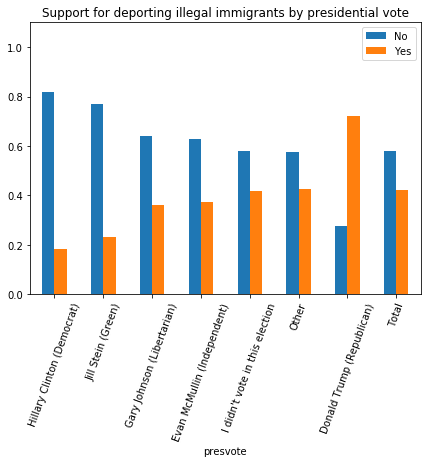

In [113]:
_ = deport.plot(kind = 'bar', rot = 70, figsize = (7,5))
_ = plt.title('Support for deporting illegal immigrants by presidential vote')
_ = plt.legend(['No', 'Yes'])
_ = plt.ylim(0, 1.1)

plt.show()

In [123]:
def opinion_plot(col, df, title):
    opinion_df = df.groupby(['presvote', col]).size() / df.groupby(['presvote']).size()

    opinion_df = opinion_df.to_frame()
    opinion_df = opinion_df.reset_index(level=[0,1])
    opinion_df = opinion_df.pivot(index ='presvote', columns = col, values = 0)
    #sort dataframe by proportion selecting the second option (1 or Favor)
    opinion_df = opinion_df.sort_values(1)
    #add line showing overall response
    opinion_df.loc['Total'] = [df.groupby([col]).size()[0]/df.shape[0], df.groupby([col]).size()[1]/df.shape[0]]
    
    _ = opinion_df.plot(kind = 'bar', rot = 70, figsize = (7,5))
    _ = plt.title(title)
    _ = plt.legend(['No', 'Yes'])
    _ = plt.ylim(0, 1.1)

    plt.show()

Question wording: "What do you think the U.S. government should do about immigration? Select all that apply. Option: Grant legal status to people who were brought to the US illegally as children, but who have graduated from a U.S. high school"

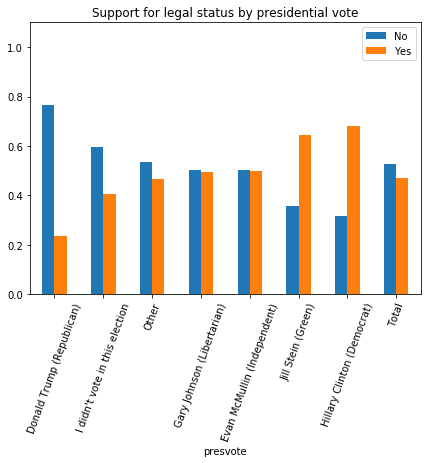

In [124]:
opinion_plot('CC16_331_3', df, 'Support for legal status by presidential vote')

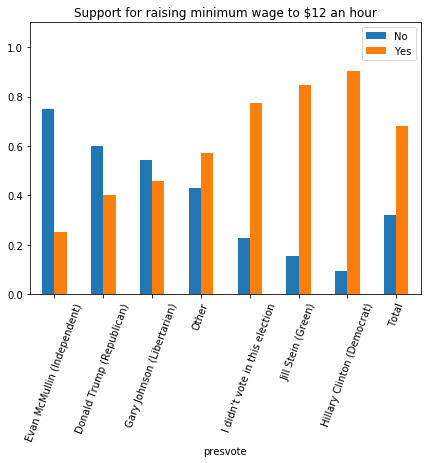

In [125]:
opinion_plot('CC16_351K', df, 'Support for raising minimum wage to $12 an hour')

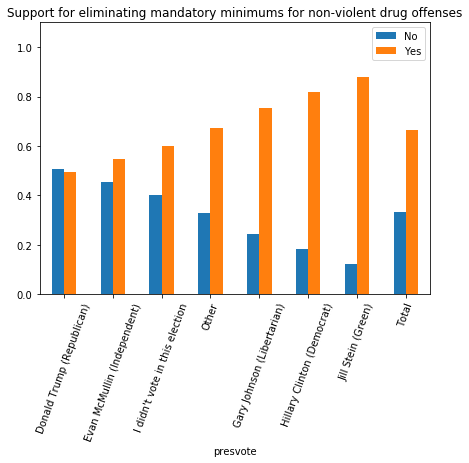

In [126]:
opinion_plot('CC16_334a', df, 'Support for eliminating mandatory minimums for non-violent drug offenses')

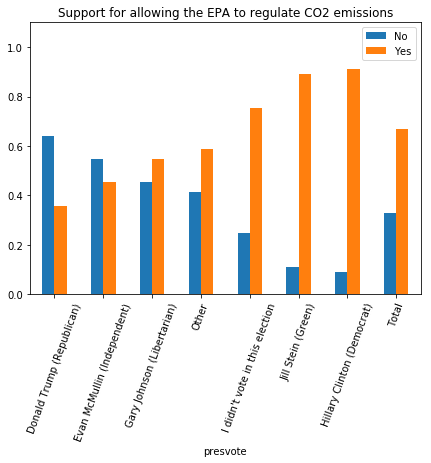

In [127]:
opinion_plot('CC16_333a', df, 'Support for allowing the EPA to regulate CO2 emissions')

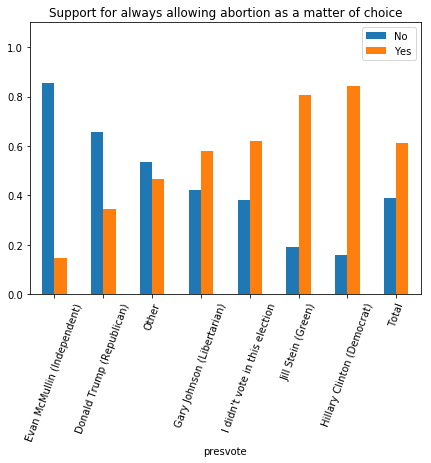

In [128]:
opinion_plot('CC16_332a', df, 'Support for always allowing abortion as a matter of choice')

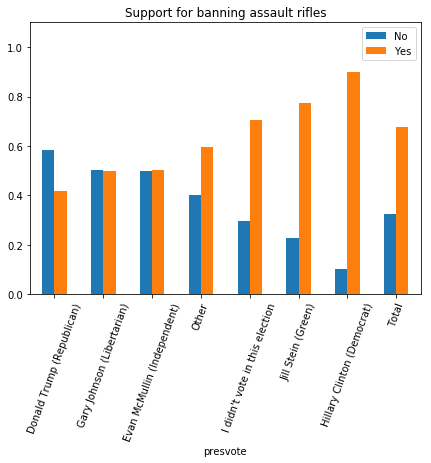

In [129]:
opinion_plot('CC16_330d', df, 'Support for banning assault rifles')

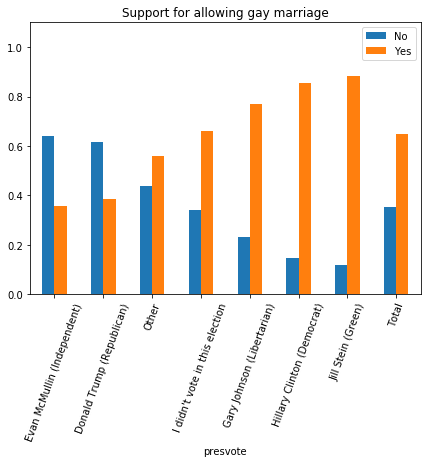

In [130]:
opinion_plot('CC16_335', df, 'Support for allowing gay marriage')